# Appendix: Support vector machines
- Decision boundaries close to training points may generalize badly
    - Very similar (nearby) test point are classified as the other class
- Choose a boundary that is as far away from training points as possible
- The __support vectors__ are the training samples closest to the hyperplane
- The __margin__ is the distance between the separating hyperplane and the _support vectors_
- Hence, our objective is to _maximize the margin_
<img src="https://raw.githubusercontent.com/fum-cs/machine-learning/main/notebooks/img/05_margin.png" alt="ml" style="width: 1250px;"/>

## Solving SVMs with Lagrange Multipliers
* Imagine a hyperplane (green) $y= \sum_1^p \mathbf{w}_i * \mathbf{x}_i + w_0$ that has slope $\mathbf{w}$, value '+1' for the positive (red) support vectors, and '-1' for the negative (blue) ones
    * Margin between the boundary and support vectors is $\frac{y-w_0}{||\mathbf{w}||}$, with $||\mathbf{w}|| = \sum_i^p w_i^2$
    * We want to find the weights that maximize $\frac{1}{||\mathbf{w}||}$. We can also do that by maximizing $\frac{1}{||\mathbf{w}||^2}$
    
    
    
    

interactive(children=(IntSlider(value=10, description='rotationX', max=20), IntSlider(value=135, description='…

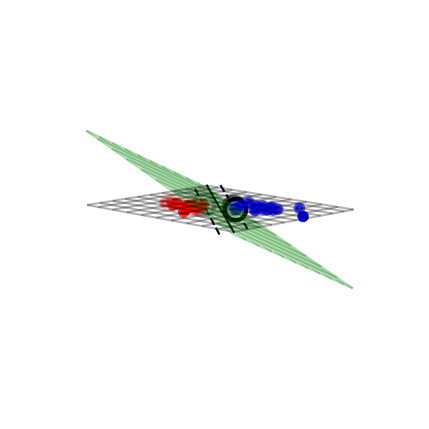

In [ ]:
from sklearn.svm import SVC

# we create 40 separable points
np.random.seed(0)
sX = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
sY = [0] * 20 + [1] * 20

# fit the model
s_clf = SVC(kernel='linear')
s_clf.fit(sX, sY)

@interact
def plot_svc_fit(rotationX=(0,20,1),rotationY=(90,180,1)):
    # get the separating hyperplane
    w = s_clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (s_clf.intercept_[0]) / w[1]
    zz = np.linspace(-2, 2, 30)

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    b = s_clf.support_vectors_[0]
    yy_down = a * xx + (b[1] - a * b[0])
    b = s_clf.support_vectors_[-1]
    yy_up = a * xx + (b[1] - a * b[0])

    # plot the line, the points, and the nearest vectors to the plane
    fig = plt.figure(figsize=(7*fig_scale,4.5*fig_scale))
    ax = plt.axes(projection="3d")
    ax.plot3D(xx, yy, [0]*len(xx), 'k-')
    ax.plot3D(xx, yy_down, [0]*len(xx), 'k--')
    ax.plot3D(xx, yy_up, [0]*len(xx), 'k--')

    ax.scatter3D(s_clf.support_vectors_[:, 0], s_clf.support_vectors_[:, 1], [0]*len(s_clf.support_vectors_[:, 0]),
                s=85*fig_scale, edgecolors='k', c='w')
    ax.scatter3D(sX[:, 0], sX[:, 1], [0]*len(sX[:, 0]), c=sY, cmap=plt.cm.bwr, s=10*fig_scale )


    # Planes
    XX, YY = np.meshgrid(xx, yy)
    if interactive:
        ZZ = w[0]*XX+w[1]*YY+clf.intercept_[0]
    else: # rescaling (for prints) messes up the Z values
        ZZ = w[0]*XX/fig_scale+w[1]*YY/fig_scale+clf.intercept_[0]*fig_scale/2
    ax.plot_wireframe(XX, YY, XX*0, rstride=5, cstride=5, alpha=0.3, color='k', label='XY plane')
    ax.plot_wireframe(XX, YY, ZZ, rstride=5, cstride=5, alpha=0.3, color='g', label='hyperplane')

    ax.set_axis_off()
    ax.view_init(rotationX, rotationY) # Use this to rotate the figure
    ax.dist = 6
    plt.tight_layout()

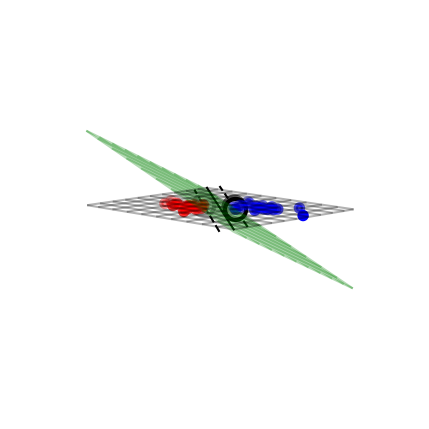

In [ ]:
if not interactive:
    plot_svc_fit(9,135)

### Geometric interpretation
- We want to maximize $f = \frac{1}{||w||^2}$ (blue contours)
- The hyperplane (red) must be $> 1$ for all positive examples:  
$g(\mathbf{w}) = \mathbf{w} \mathbf{x_i} + w_0 > 1 \,\,\, \forall{i}, y(i)=1$
- Find the weights $\mathbf{w}$ that satify $g$ but maximize $f$

<img src="https://raw.githubusercontent.com/fum-cs/machine-learning/main/notebooks/img/LagrangeMultipliers3D.png" alt="ml" style="width: 950px;"/>

### Solution
* A quadratic loss function with linear constraints can be solved with *Lagrangian multipliers*
* This works by assigning a weight $a_i$ (called a dual coefficient) to every data point $x_i$
    * They reflect how much individual points influence the weights $\mathbf{w}$
    * The points with non-zero $a_i$ are the _support vectors_
* Next, solve the following **Primal** objective:
    * $y_i=\pm1$ is the correct class for example $x_i$

$$\mathcal{L}_{Primal} = \frac{1}{2} ||\mathbf{w}||^2 - \sum_{i=1}^{n} a_i y_i (\mathbf{w} \mathbf{x_i}  + w_0) + \sum_{i=1}^{n} a_i $$

so that

$$ \mathbf{w} = \sum_{i=1}^{n} a_i y_i \mathbf{x_i} $$
$$ a_i \geq 0 \quad \text{and} \quad \sum_{i=1}^{l} a_i y_i = 0 $$

* It has a **Dual** formulation as well (See 'Elements of Statistical Learning' for the derivation):

$$\mathcal{L}_{Dual} = \sum_{i=1}^{l} a_i - \frac{1}{2} \sum_{i,j=1}^{l} a_i a_j y_i y_j (\mathbf{x_i} \mathbf{x_j}) $$

so that

$$ a_i \geq 0 \quad \text{and} \quad \sum_{i=1}^{l} a_i y_i = 0 $$

* Computes the dual coefficients directly. A number $l$ of these are non-zero (sparseness).
    * Dot product $\mathbf{x_i} \mathbf{x_j}$ can be interpreted as the closeness between points $\mathbf{x_i}$ and $\mathbf{x_j}$
    * $\mathcal{L}_{Dual}$ increases if nearby support vectors $\mathbf{x_i}$ with high weights $a_i$ have different class $y_i$
    * $\mathcal{L}_{Dual}$ also increases with the number of support vectors $l$ and their weights $a_i$

* Can be solved with quadratic programming, e.g. Sequential Minimal Optimization (SMO)

Example result. The circled samples are support vectors, together with their coefficients.

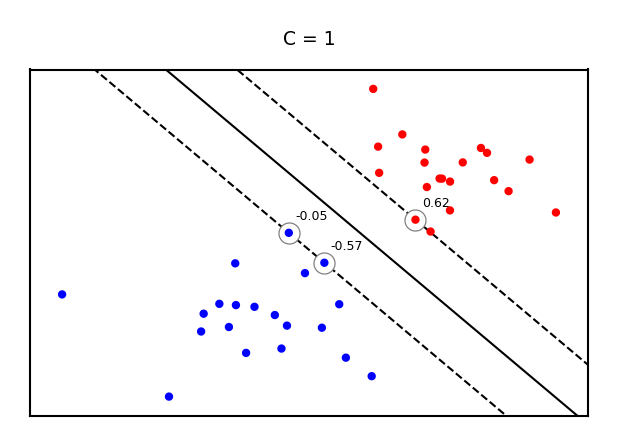

In [ ]:
from sklearn.svm import SVC

# Plot SVM support vectors
def plot_linear_svm(X,y,C,ax):

    clf = SVC(kernel='linear', C=C)
    clf.fit(X, y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane
    yy_down = (-1-w[0]*xx-clf.intercept_[0])/w[1]
    yy_up = (1-w[0]*xx-clf.intercept_[0])/w[1]

    # plot the line, the points, and the nearest vectors to the plane
    ax.set_title('C = %s' % C)
    ax.plot(xx, yy, 'k-')
    ax.plot(xx, yy_down, 'k--')
    ax.plot(xx, yy_up, 'k--')
    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=85*fig_scale, edgecolors='gray', c='w', zorder=10, lw=1*fig_scale)
    ax.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.bwr)
    ax.axis('tight')

    # Add coefficients
    for i, coef in enumerate(clf.dual_coef_[0]):
        ax.annotate("%0.2f" % (coef), (clf.support_vectors_[i, 0]+0.1,clf.support_vectors_[i, 1]+0.35), fontsize=10*fig_scale, zorder=11)

    ax.set_xlim(np.min(X[:, 0])-0.5, np.max(X[:, 0])+0.5)
    ax.set_ylim(np.min(X[:, 1])-0.5, np.max(X[:, 1])+0.5)
    ax.set_xticks(())
    ax.set_yticks(())


# we create 40 separable points
np.random.seed(0)
svm_X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
svm_Y = [0] * 20 + [1] * 20
svm_fig, svm_ax = plt.subplots(figsize=(8*fig_scale,5*fig_scale))
plot_linear_svm(svm_X,svm_Y,1,svm_ax)

## Making predictions
- $a_i$ will be *0* if the training point lies on the right side of the decision boundary and outside the margin 
- The training samples for which $a_i$ is not 0 are the _support vectors_ 
- Hence, the SVM model is completely defined by the support vectors and their dual coefficients (weights)

- Knowing the dual coefficients $a_i$, we can find the weights $w$ for the maximal margin separating hyperplane:  

$$ \mathbf{w} = \sum_{i=1}^{l} a_i y_i \mathbf{x_i} $$

- Hence, we can classify a new sample $\mathbf{u}$ by looking at the sign of $\mathbf{w}\mathbf{u}+w_0$


## SVMs and kNN
* Remember, we will classify a new point $\mathbf{u}$ by looking at the sign of:  

$$f(x) = \mathbf{w}\mathbf{u}+w_0 = \sum_{i=1}^{l} a_i y_i \mathbf{x_i}\mathbf{u}+w_0$$

* _Weighted k-nearest neighbor_ is a generalization of the k-nearest neighbor classifier. It classifies points by evaluating:  

$$f(x) = \sum_{i=1}^{k} a_i y_i dist(x_i, u)^{-1}$$

* Hence: SVM's predict much the same way as k-NN, only:
    - They only consider the truly important points (the support vectors): _much_ faster
        - The number of neighbors is the number of support vectors
    - The distance function is an _inner product of the inputs_

## Regularized (soft margin) SVMs

- If the data is not linearly separable, (hard) margin maximization becomes meaningless
- Relax the contraint by allowing an error $\xi_{i}$: $y_i (\mathbf{w}\mathbf{x_i} + w_0) \geq 1 - \xi_{i}$
- Or (since $\xi_{i} \geq 0$):

$$\xi_{i} =  max(0,1-y_i\cdot(\mathbf{w}\mathbf{x_i} + w_0))$$

- The sum over all points is called _hinge loss_: $\sum_i^n \xi_{i}$
- Attenuating the error component with a hyperparameter $C$, we get the objective

$$\mathcal{L}(\mathbf{w}) = ||\mathbf{w}||^2 + C \sum_i^n \xi_{i}$$

- Can still be solved with quadratic programming

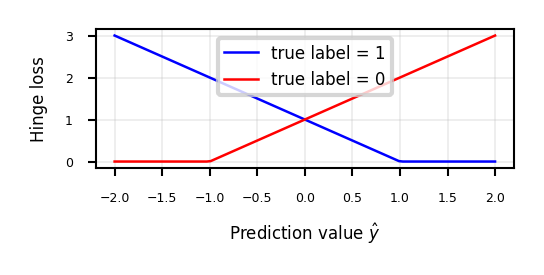

In [ ]:
def hinge_loss(yHat, y):
    if y == 1:
        return np.maximum(0,1-yHat)
    else:
        return np.maximum(0,1+yHat)

fig, ax = plt.subplots(figsize=(6*fig_scale,2*fig_scale))
x = np.linspace(-2,2,100)

ax.plot(x,hinge_loss(x, 1),lw=2*fig_scale,c='b',label='true label = 1', linestyle='-')
ax.plot(x,hinge_loss(x, 0),lw=2*fig_scale,c='r',label='true label = 0', linestyle='-')
ax.set_xlabel(r"Prediction value $\hat{y}$")
ax.set_ylabel("Hinge loss")
plt.grid()
plt.legend()

## Least Squares SVMs

- We can also use the _squares_ of all the errors, or squared hinge loss: $\sum_i^n \xi_{i}^2$
- This yields the Least Squares SVM objective

$$\mathcal{L}(\mathbf{w}) = ||\mathbf{w}||^2 + C \sum_i^n \xi_{i}^2$$

- Can be solved with Lagrangian Multipliers and a set of linear equations
    - Still yields support vectors and still allows kernel trick
    - Support vectors are not sparse, but pruning techniques exist

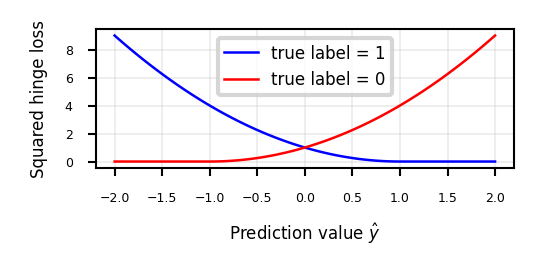

In [ ]:
fig, ax = plt.subplots(figsize=(6*fig_scale,2*fig_scale))
x = np.linspace(-2,2,100)

ax.plot(x,hinge_loss(x, 1)** 2,lw=2*fig_scale,c='b',label='true label = 1', linestyle='-')
ax.plot(x,hinge_loss(x, 0)** 2,lw=2*fig_scale,c='r',label='true label = 0', linestyle='-')
ax.set_xlabel(r"Prediction value $\hat{y}$")
ax.set_ylabel("Squared hinge loss")
plt.grid()
plt.legend();

## Effect of regularization on margin and support vectors
- SVM's Hinge loss acts like L1 regularization, yields sparse models
- C is the _inverse_ regularization strength (inverse of $\alpha$ in Lasso)
    - Larger C: fewer support vectors, smaller margin, more overfitting
    - Smaller C: more support vectors, wider margin, less overfitting
- Needs to be tuned carefully to the data

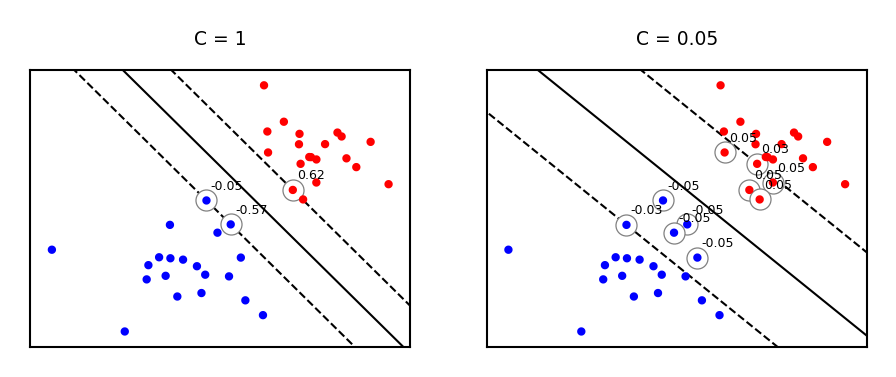

In [ ]:
fig, svm_axes = plt.subplots(nrows=1, ncols=2, figsize=(12*fig_scale, 4*fig_scale))
plot_linear_svm(svm_X,svm_Y,1,svm_axes[0])
plot_linear_svm(svm_X,svm_Y,0.05,svm_axes[1])

Same for non-linearly separable data

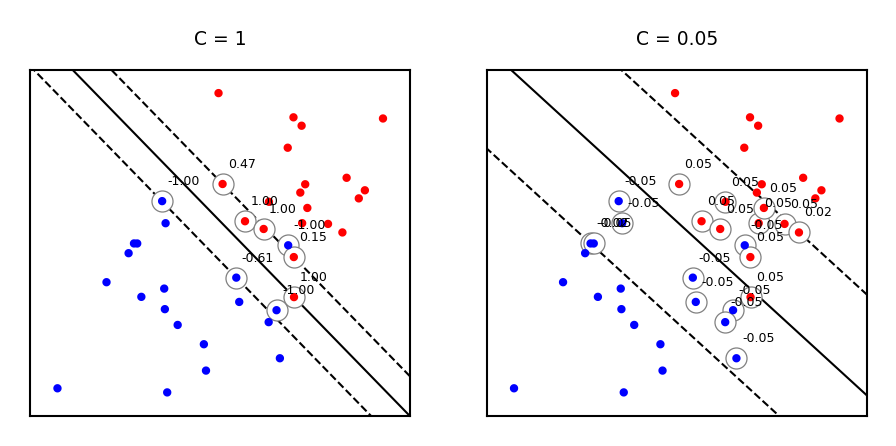

In [ ]:
svm_X = np.r_[np.random.randn(20, 2) - [1, 1], np.random.randn(20, 2) + [1, 1]]
fig, svm_axes = plt.subplots(nrows=1, ncols=2, figsize=(12*fig_scale, 5*fig_scale))
plot_linear_svm(svm_X,svm_Y,1,svm_axes[0])
plot_linear_svm(svm_X,svm_Y,0.05,svm_axes[1])

Large C values can lead to overfitting (e.g. fitting noise), small values can lead to underfitting

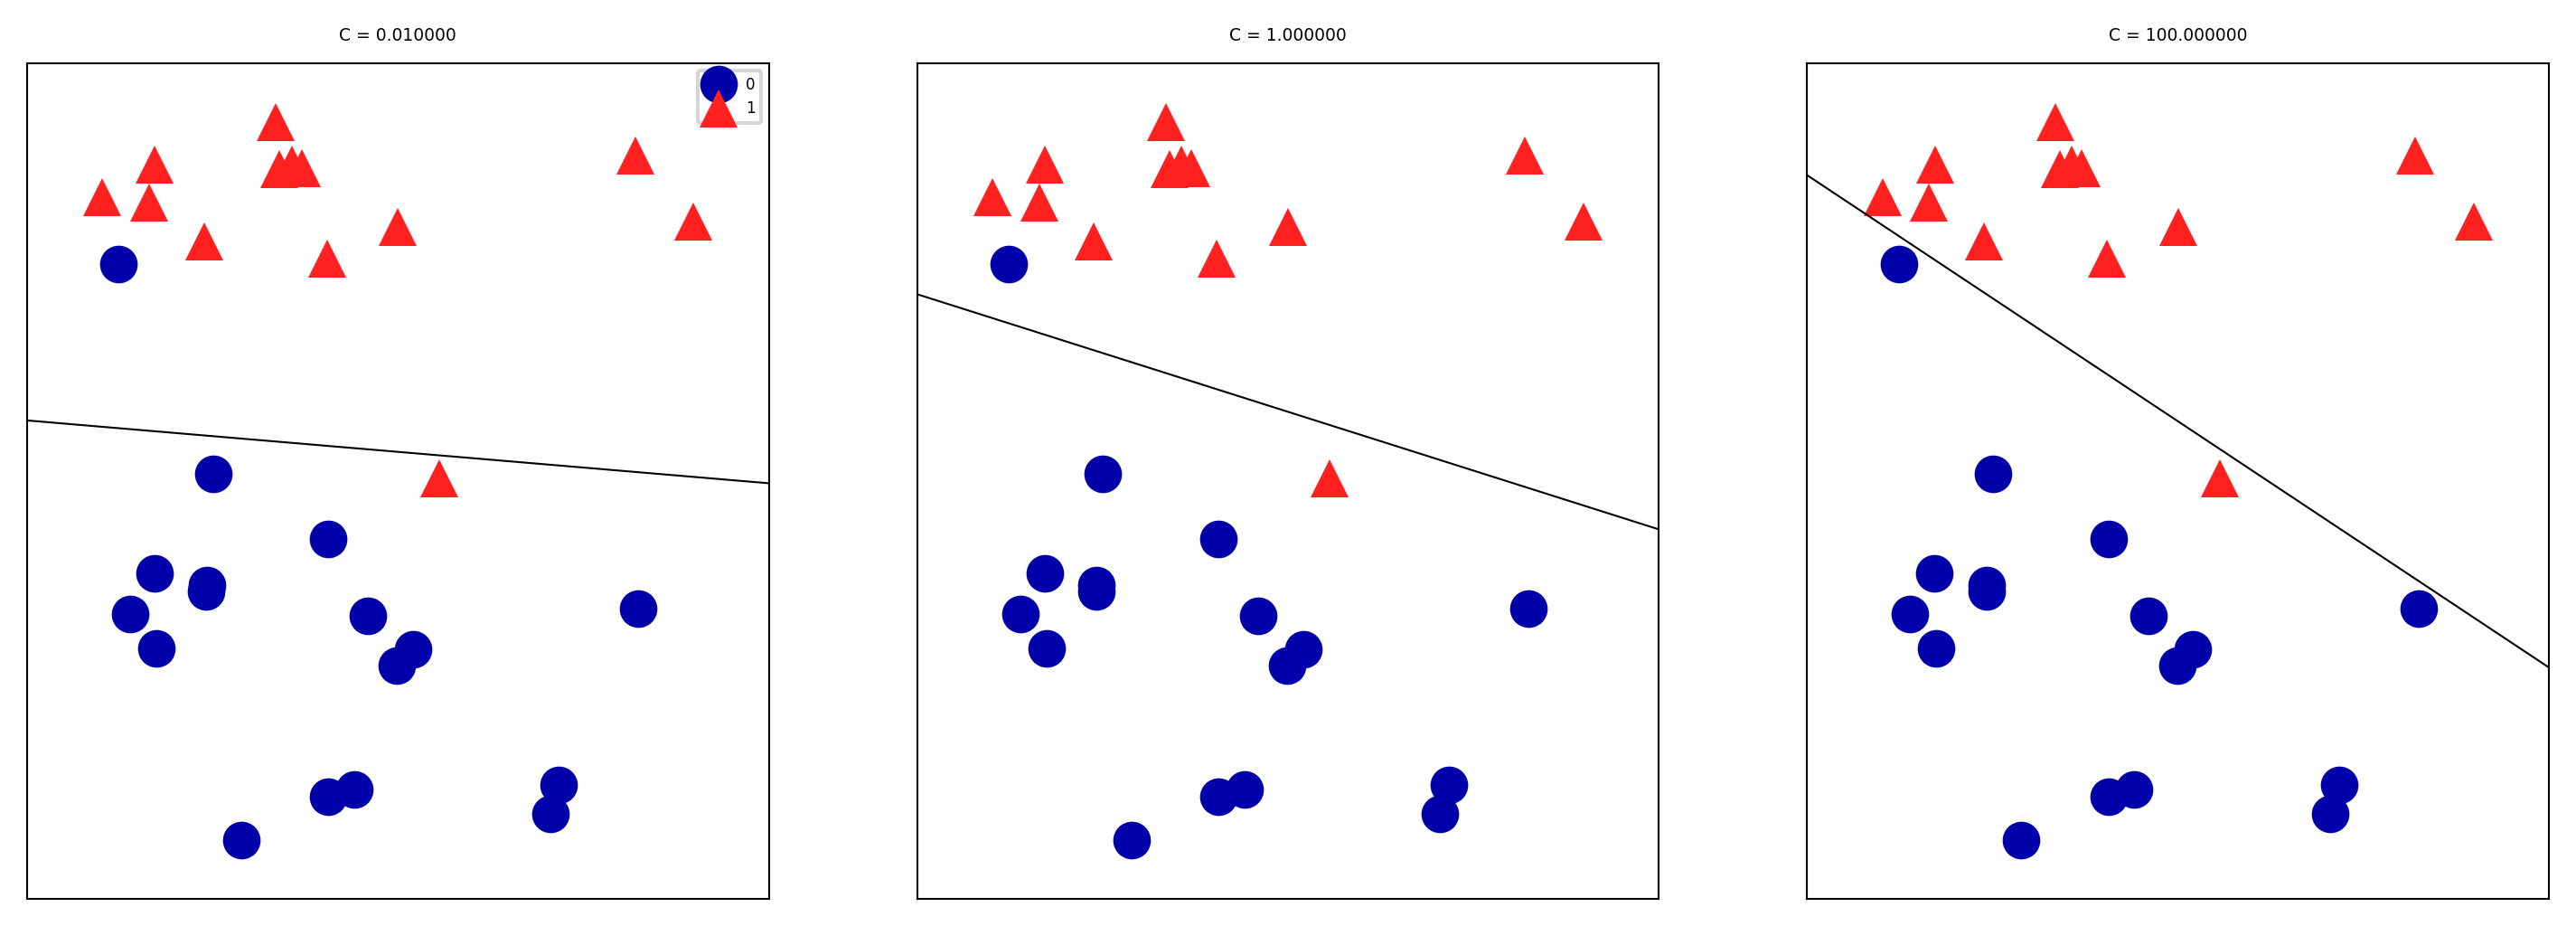

In [ ]:
mglearn.plots.plot_linear_svc_regularization()

## SVMs in scikit-learn

- `svm.LinearSVC`: faster for large datasets
    - Allows choosing between the primal or dual. Primal recommended when $n$ >> $p$
    - Returns `coef_` ($\mathbf{w}$) and `intercept_` ($w_0$)
- `svm.SVC` with `kernel=linear`: allows _kernel trick_ (see later)
    - Also returns `support_vectors_` (the support vectors) and the `dual_coef_` $a_i$
    - Scales at least quadratically with the number of samples $n$
- `svm.LinearSVR` and `svm.SVR` are variants for regression
``` python
clf = svm.SVC(kernel='linear')
clf.fit(X, y)
print("Support vectors:", clf.support_vectors_[:])
print("Coefficients:", clf.dual_coef_[:])
```

In [ ]:
from sklearn import svm

# Linearly separable dat
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
y = [0] * 20 + [1] * 20

# Fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Get the support vectors and weights
print("Support vectors:")
print(clf.support_vectors_[:])
print("Coefficients:")
print(clf.dual_coef_[:])

Support vectors:
[[-1.021  0.241]
 [-0.467 -0.531]
 [ 0.951  0.58 ]]
Coefficients:
[[-0.048 -0.569  0.617]]


## Solving SVMs with Gradient Descent
* Soft-margin SVMs can, alternatively, be solved using gradient decent
    * Good for large datasets, but does not yield support vectors or kernel trick
* Squared Hinge is differentiable
* Hinge is not differentiable but convex, and has a subgradient:

$$\mathcal{L_{Hinge}}(\mathbf{w}) =  max(0,1-y_i (\mathbf{w}\mathbf{x_i} + w_0))$$

$$\frac{\partial \mathcal{L_{Hinge}}}{\partial w_i} =  \begin{cases}-y_i x_i & y_i (\mathbf{w}\mathbf{x_i} + w_0) < 1\\ 0 & \text{otherwise} \\ \end{cases}$$

* Can be solved with (stochastic) gradient descent

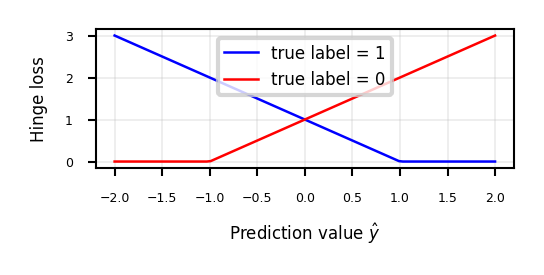

In [ ]:
fig, ax = plt.subplots(figsize=(6*fig_scale,2*fig_scale))
x = np.linspace(-2,2,100)

ax.plot(x,hinge_loss(x, 1),lw=2*fig_scale,c='b',label='true label = 1', linestyle='-')
ax.plot(x,hinge_loss(x, 0),lw=2*fig_scale,c='r',label='true label = 0', linestyle='-')
ax.set_xlabel(r"Prediction value $\hat{y}$")
ax.set_ylabel("Hinge loss")
plt.grid()
plt.legend()

## Generalized SVMs
* Because the derivative of hinge loss is undefined at y=1, smoothed versions are often used:
    * Squared hinge loss: yields _least squares SVM_
        - Equivalent to Ridge classification (with different solver)
    * Modified Huber loss: squared hinge, but linear after -1. Robust against outliers
* Log loss can also be used (equivalent to logistic regression) 
* In sklearn, `SGDClassifier` can be used with any of these. Good for large datasets.

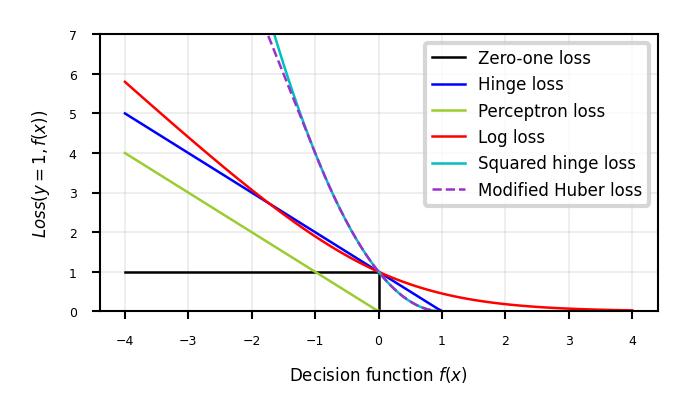

In [ ]:
def modified_huber_loss(y_true, y_pred):
    z = y_pred * y_true
    loss = -4 * z
    loss[z >= -1] = (1 - z[z >= -1]) ** 2
    loss[z >= 1.] = 0
    return loss

xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)
lw = 2*fig_scale
fig, ax = plt.subplots(figsize=(8*fig_scale,4*fig_scale))
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], 'k-', lw=lw,
         label="Zero-one loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0), 'b-', lw=lw,
         label="Hinge loss")
plt.plot(xx, -np.minimum(xx, 0), color='yellowgreen', lw=lw,
         label="Perceptron loss")
plt.plot(xx, np.log2(1 + np.exp(-xx)), 'r-', lw=lw,
         label="Log loss")
plt.plot(xx, np.where(xx < 1, 1 - xx, 0) ** 2, 'c-', lw=lw,
         label="Squared hinge loss")
plt.plot(xx, modified_huber_loss(xx, 1), color='darkorchid', lw=lw,
         linestyle='--', label="Modified Huber loss")
plt.ylim((0, 7))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $f(x)$")
plt.ylabel("$Loss(y=1, f(x))$")
plt.grid()
plt.legend()